## Simulation und Modellierung WS16/17
### Uebung 08

Schauen Sie sich den folgenden Code an, und versuchen Sie zu verstehen, was dieser macht :

In [2]:
import numpy as np
s2=0.1
m=0.01

Nn = np.array([1,10,50,100,500,1000])
Nmax=max(Nn)

f = open('single_particle_random_walks.dat','w')
f.write('#200 single particle positions at 6 different time steps\n')
f.write('# nr. x(n) for n=')
for n in Nn :
    f.write(str(n)+" ")
f.write("\n#\n")

for nr in range(200) :
    f.write(str(nr)+" ")
    x = np.cumsum( (np.random.rand(Nmax)-0.5) * np.sqrt(s2) + m )
    for n in Nn :
        f.write("{:10.5f} ".format(x[n-1]))
    f.write("\n")
    
f.close()

Fuehren Sie den Code aus, und schauen sich den Inhalt der Datei `single_particle_random_walks.dat` an. Laden Sie sich die Daten in ein `numpy` Array

In [3]:
data = np.loadtxt("single_particle_random_walks.dat")
print(data)

[[  0.00000000e+00   2.62700000e-02   2.09370000e-01 ...,   8.46390000e-01
    6.01894000e+00   1.53361600e+01]
 [  1.00000000e+00  -2.92500000e-02  -1.15010000e-01 ...,  -6.49310000e-01
   -3.58880000e-01   4.26252000e+00]
 [  2.00000000e+00   4.16400000e-02   2.53920000e-01 ...,   1.09194000e+00
    2.18426000e+00   6.38455000e+00]
 ..., 
 [  1.97000000e+02  -1.95300000e-02  -5.25400000e-02 ...,  -5.91700000e-01
    2.64269000e+00   6.92198000e+00]
 [  1.98000000e+02   6.93500000e-02   2.17890000e-01 ...,   1.86706000e+00
    4.07797000e+00   8.88237000e+00]
 [  1.99000000e+02  -4.48000000e-02  -3.83290000e-01 ...,   2.76501000e+00
    9.27477000e+00   1.29247800e+01]]


- Plotten Sie alle Trajektorien x(n) in ein Diagramm (eine Zeile der Tabelle ist eine Trajektorie)
- Plotten Sie zu jeder Spalte von x-Werten ein Histogramm der Wahrscheinlichkeitsdichte. 
- Plotten Sie die Mittelwerte der Spalten x(n) als Funktion von n mit Fehlerbalken der Laenge einer Standardabweichung.
- Plotten Sie die Standardabweichung als Funktion von n und versuchen Sie durch geeignete Skalierung der Koordinatenaxen herauszubekommen, welcher funktionale Zusammenhang besteht.

Beschriften Sie die Achsen der Plots.

[0.088660743778729387, 0.27757250512188703, 0.63129881648160691, 0.93790180889613384, 2.2103543986739416, 2.9601351448356144]


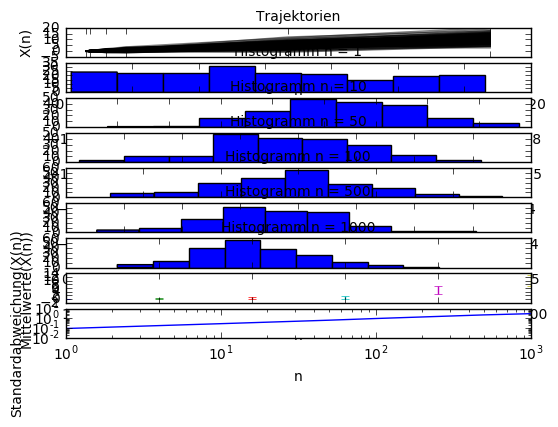

In [5]:
%matplotlib inline
from pylab import *

#plot(...,color=(0,0,0,0.5)) # semitransparente schwarze Linien
#hist(...)
#errorbar(...)
#plot(...) semilogx(...) semilogy(...) loglog(...) ?

### erster Part: Diagrammplot über alle X|n Werte

n = [1,10,50,100,500,1000]            # n als Vektor über alle Werte von n
  
X_n = np.ones((200,6))                # X_n ist eine Matrix über alle X-Werte,
                                      # hier erst vordimensioniert
                                      
for i in range(6):                    # Eintragen der X-Werte ais data in die vordimensionierte Matrix
	X_n[:,i] = data[:,i+1]  
  
# print(X_n)  
  
#### Plotsection                       # Beginn der Plotsektion zum Plotten der X-Werte auf n sowie die jeweiligen Histogramme
 
### Diagramm über X|n    
    
plt.subplot(911)                      # Erster Plot X-Werte auf die n-Werte (weitere Plots werden als subplots weitergeführt)
  
for z in range(200):                  # alle Plots werden geloopt
	plt.plot(n,X_n[z,:],color=(0,0,0,0.5))  
  
  
  
plt.xlim(-50,1100)                    # sinnvolle Limittierung der X-Achse 
plt.ylim(-5,20)                       #           -"-          der Y-Achse         
plt.xticks([1,10,50,100,500,1000])	  # Ändern der X-Tickmarks aus visuellen Gründen
plt.xlabel('n')                       # Beschriftung der X-Achse (ist die Achse über die n-Werte nicht der X-Werte)
plt.ylabel('X(n)')                    #       -"-    der Y-Achse (X(n))
plt.title('Trajektorien',fontsize=10) # Beschriftung des Diagrammtitels





### Histogrammplots

## n=1

plt.subplot(912)                                       # alle Histogrammplots werden als subplots zeilenweise weiter geführt

bins_1 = np.linspace(min(X_n[:,0]),max(X_n[:,0]),10)   # definieren der bins über minimal- und maximalwerte

plt.hist(X_n[:,0],bins_1)                              # Plotbefehl des Histogrammplot
plt.title('Histogramm n = 1',fontsize=10)              # Beschriftung des Diagrammtitels mit Definierung 
                                                       # einer adäquaten Schriftgröße

## n=10

plt.subplot(913)

bins_1 = np.linspace(min(X_n[:,1]),max(X_n[:,1]),10)

plt.hist(X_n[:,1],bins_1)
plt.title('Histogramm n = 10',fontsize=10)

## n=50

plt.subplot(914)

bins_1 = np.linspace(min(X_n[:,2]),max(X_n[:,2]),10)

plt.hist(X_n[:,2],bins_1)
plt.title('Histogramm n = 50',fontsize=10)

## n=100

plt.subplot(915)

bins_1 = np.linspace(min(X_n[:,3]),max(X_n[:,3]),10)

plt.hist(X_n[:,3],bins_1)
plt.title('Histogramm n = 100',fontsize=10)

## n=500

plt.subplot(916)

bins_1 = np.linspace(min(X_n[:,4]),max(X_n[:,4]),10)

plt.hist(X_n[:,4],bins_1)
plt.title('Histogramm n = 500',fontsize=10)

## n=1000

plt.subplot(917)

bins_1 = np.linspace(min(X_n[:,5]),max(X_n[:,5]),10)

plt.hist(X_n[:,5],bins_1)
plt.title('Histogramm n = 1000',fontsize=10)

### Plot über Mittelwerte mit Standardabweichung auf alle n

## ermitteln der Mittelwerte und Standardabweichungen aller X(n)

means_X = []
stds_X  = []
X       = [1,2,3,4,5,6]

for i in range(6):
    means_X.append(np.mean(X_n[:,i]))
    
for i in range(6):
    stds_X.append(np.std(X_n[:,i]))
    
print(stds_X)

## plotten des Diagramms der Mittelwerte über alle X(n) mit Fehlerbalken wobei jeder jeweilige Fehler 
## durch die jeweilige Standardabweichung representiert wird


plt.subplot(918)

for i in range(6):
    plt.errorbar(X[i],means_X[i], stds_X[i])

plt.xticks(X,[1,10,50,100,500,1000])             # ändern der Xticklabels auf die entsprechenden n-Werte
plt.xlabel('n')
plt.ylabel('Mittelwerte(X(n))')


## plotten der Standardabweichungen auf alle n

plt.subplot(919)

plt.loglog(n,stds_X)

plt.xlabel('n')
plt.ylabel('Standardabweichung(X(n))')
    



plt.show()




